In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('covid_19_data.csv')

In [3]:
df

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [4]:
df.tail()

,Date,State,Region,Confirmed,Deaths,Recovered
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181
320,4/29/2020,Zhejiang,Mainland China,1268,1,1263


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [6]:
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [7]:
df.fillna(0, inplace=True)

In [8]:
df.isnull().sum()

Date         0
State        0
Region       0
Confirmed    0
Deaths       0
Recovered    0
dtype: int64

In [9]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,0,Afghanistan,1939,60,252
1,4/29/2020,0,Albania,766,30,455
2,4/29/2020,0,Algeria,3848,444,1702
3,4/29/2020,0,Andorra,743,42,423
4,4/29/2020,0,Angola,27,2,7


In [10]:
df.describe()

,Confirmed,Deaths,Recovered
count,321.000000,321.000000,321.000000
mean,9949.800623,709.152648,3030.277259
std,31923.853086,3236.162817,14364.870365
min,0.000000,0.000000,0.000000
25%,104.000000,2.000000,2.000000
50%,653.000000,12.000000,73.000000
75%,4655.000000,144.000000,587.000000
max,299691.000000,27682.000000,132929.000000


In [11]:
top5 = df.groupby("State")["Confirmed"].max().sort_values(ascending=False).head(5)
print(top5)

State
New York         299691
0                236899
New Jersey       116365
Hubei             68128
Massachusetts     60265
Name: Confirmed, dtype: int64


In [12]:
print("Total Confirmed:", df["Confirmed"].sum())

Total Confirmed: 3193886


In [13]:
print("Total Deaths:", df["Deaths"].sum())

Total Deaths: 227638


In [14]:
print("Total Recovered:", df["Recovered"].sum())

Total Recovered: 972719


In [15]:
datewise = df.groupby("Date")[["Confirmed","Deaths","Recovered"]].sum()
print(datewise.tail())

           Confirmed  Deaths  Recovered
Date                                   
4/29/2020    3193886  227638     972719


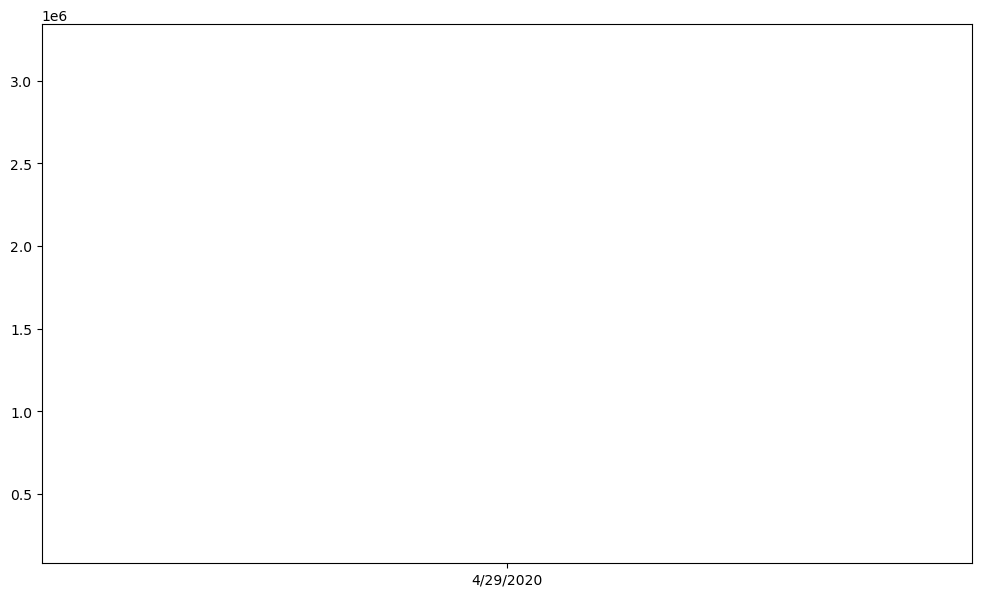

C:\Users\Hp\AppData\Local\Temp\ipykernel_19400\1623077003.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


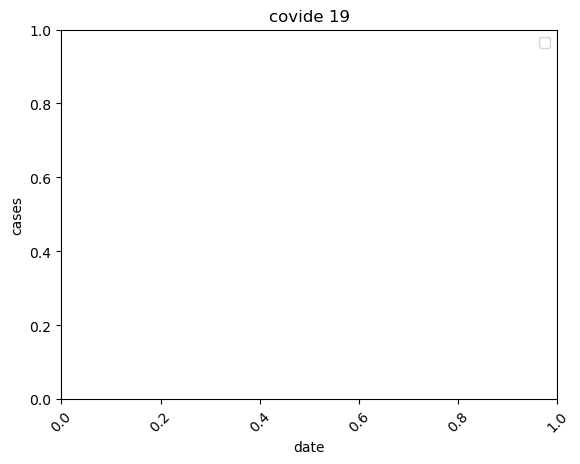

In [16]:
plt.figure(figsize=(12,7))
plt.plot(datewise.index, datewise["Confirmed"], label="Confirmed", color="blue")
plt.plot(datewise.index, datewise["Deaths"], label="Deaths", color="red")
plt.plot(datewise.index, datewise["Recovered"], label="Recovered", color="green")
plt.show()
plt.title("covide 19")
plt.xlabel("date")
plt.ylabel("cases")
plt.xticks(rotation=45)
plt.legend()

C:\Users\Hp\AppData\Local\Temp\ipykernel_19400\606032928.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regionwise.index, y=regionwise["Confirmed"], palette="viridis")


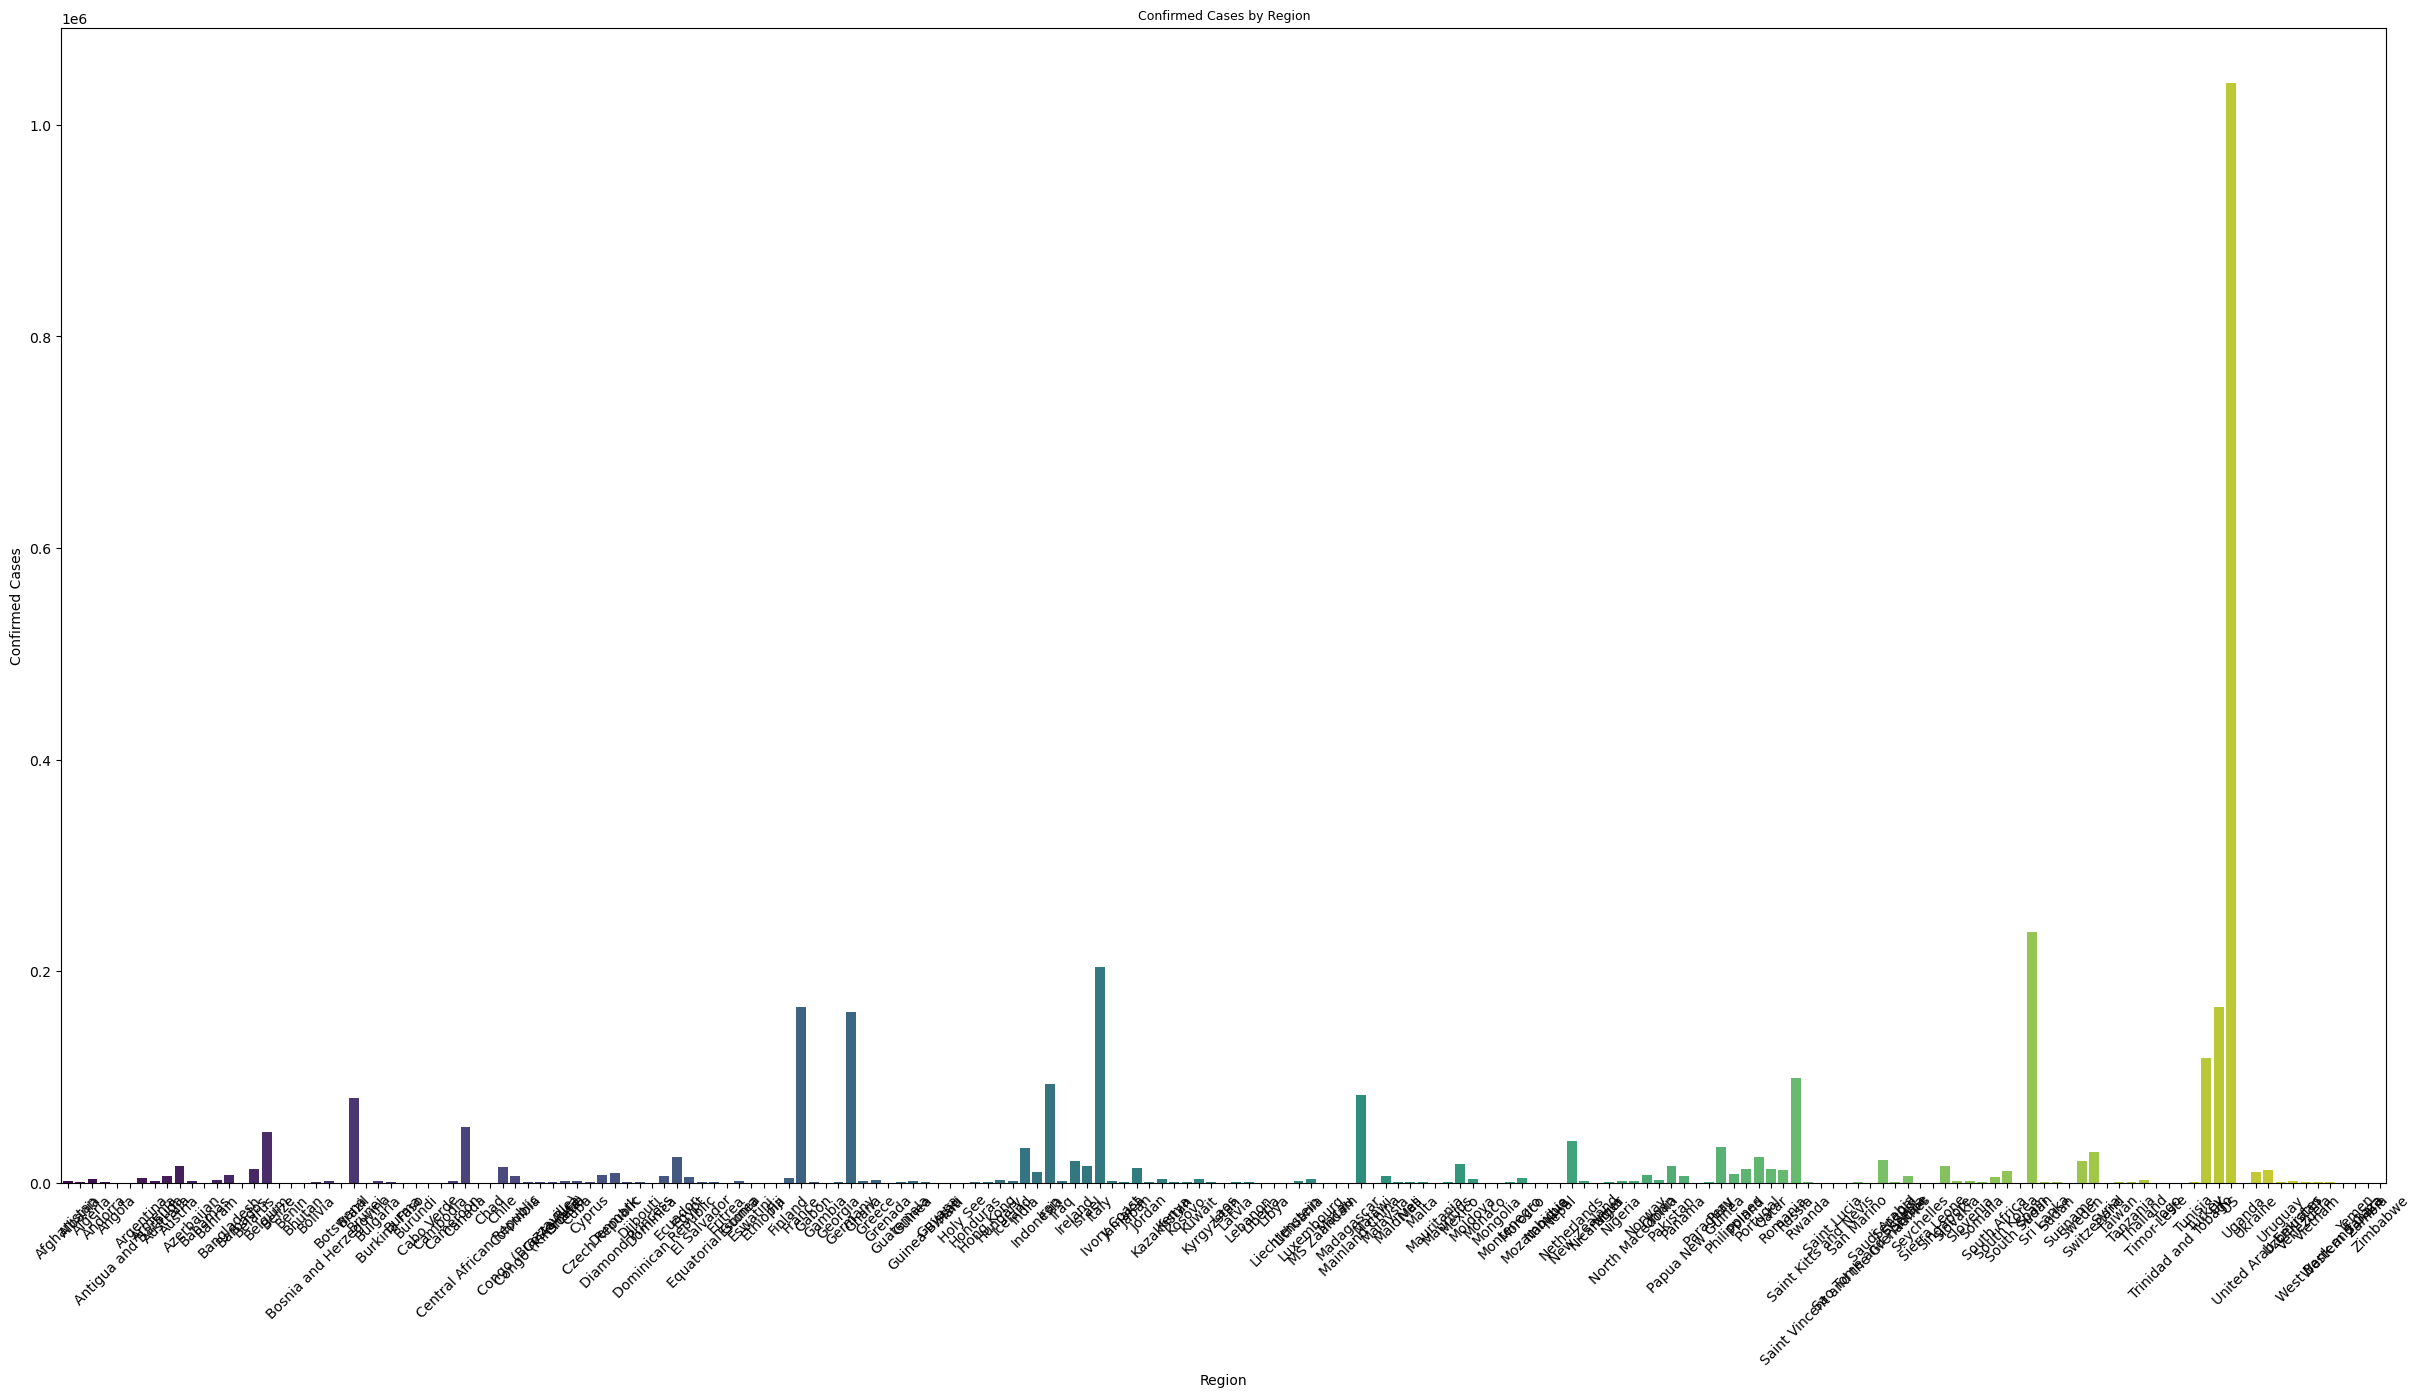

In [17]:

regionwise = df.groupby("Region")[["Confirmed","Deaths","Recovered"]].sum()

plt.figure(figsize=(30,15))
sns.barplot(x=regionwise.index, y=regionwise["Confirmed"], palette="viridis")

plt.title("Confirmed Cases by Region", fontsize=9)
plt.xlabel("Region")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45)
plt.show()


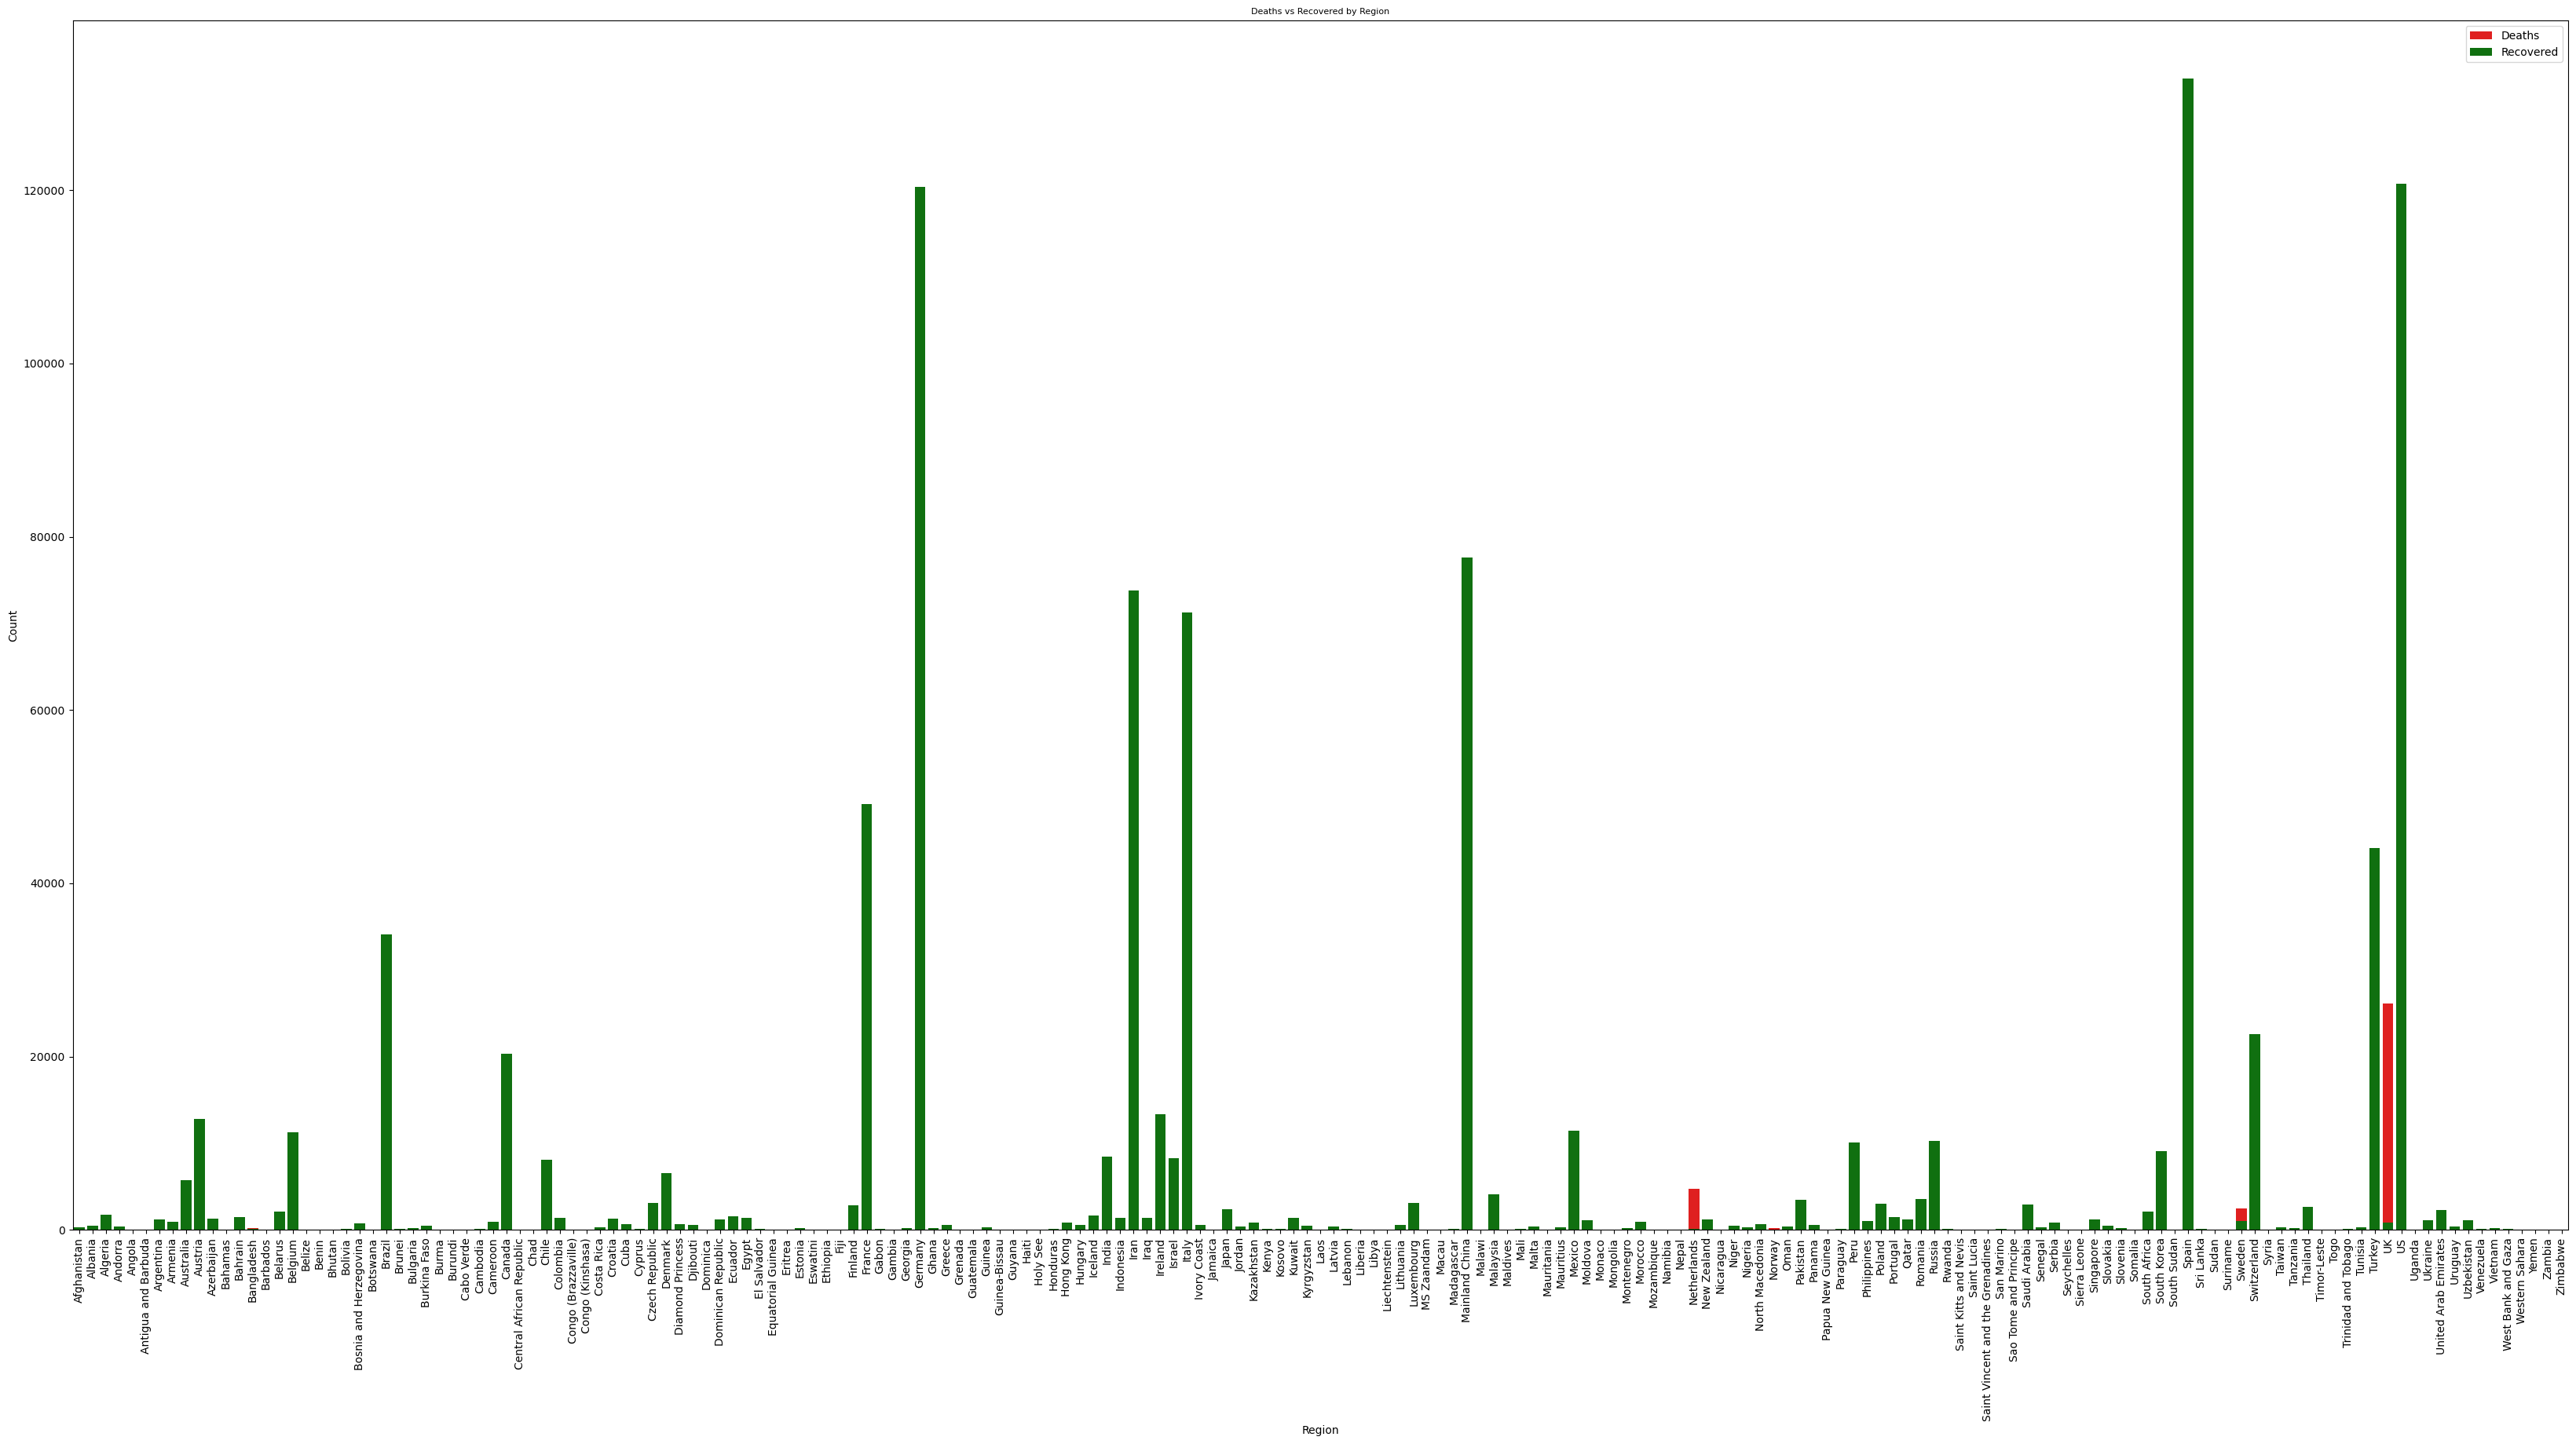

In [18]:
plt.figure(figsize=(41,20))
sns.barplot(x=regionwise.index, y=regionwise["Deaths"], color="red", label="Deaths")
sns.barplot(x=regionwise.index, y=regionwise["Recovered"], color="green", label="Recovered")

plt.title("Deaths vs Recovered by Region", fontsize=8)
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend()
plt.show()


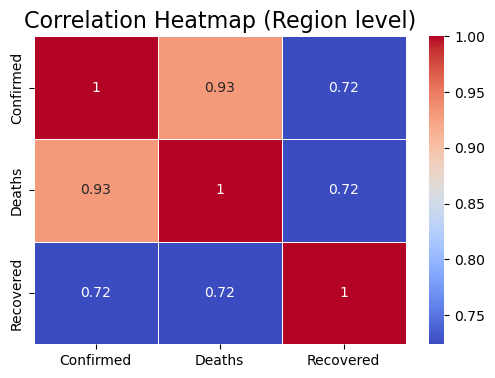

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(regionwise[["Confirmed","Deaths","Recovered"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap (Region level)", fontsize=16)
plt.show()
